**Exercise 2: Edge detection**

*CPSC 480/580: Computer Vision*

*Yale University*

*Instructor: Alex Wong*

Import packages

In [ ]:
import skimage, scipy
import skimage.filters
import numpy as np
import matplotlib.pyplot as plt

Utility functions for plotting

In [ ]:
def config_plot():
    '''
    Function to remove axis tickers and box around figure
    '''

    plt.box(False)
    plt.axis('off')

Loading data

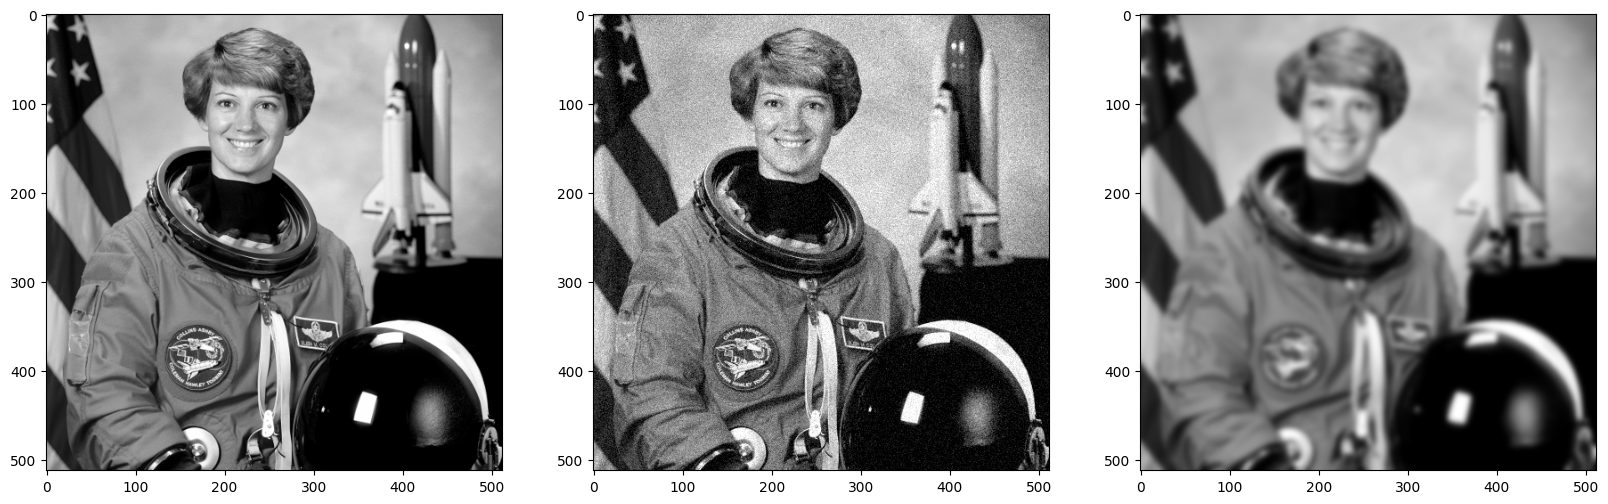

In [ ]:
# TODO: Load astronaunt image from skimage
image = skimage.data.astronaut()

# TODO: Create a grayscale version of the image if it isn't already
image = skimage.color.rgb2gray(image)

# TODO: Add random Gaussian noise with variance of 0.005 to simulate noisy capture
image_noisy = skimage.util.random_noise(image, mode = "gaussian", var = 0.005)

# TODO: Smooth noise with Gaussian filter with sigma of 3
image_smooth = skimage.filters.gaussian(image, sigma = 3)

fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.imshow(image, cmap = "gray")
ax2.imshow(image_noisy, cmap = 'gray')
ax3.imshow(image_smooth, cmap = 'gray')

plt.show()

Roberts edge detector

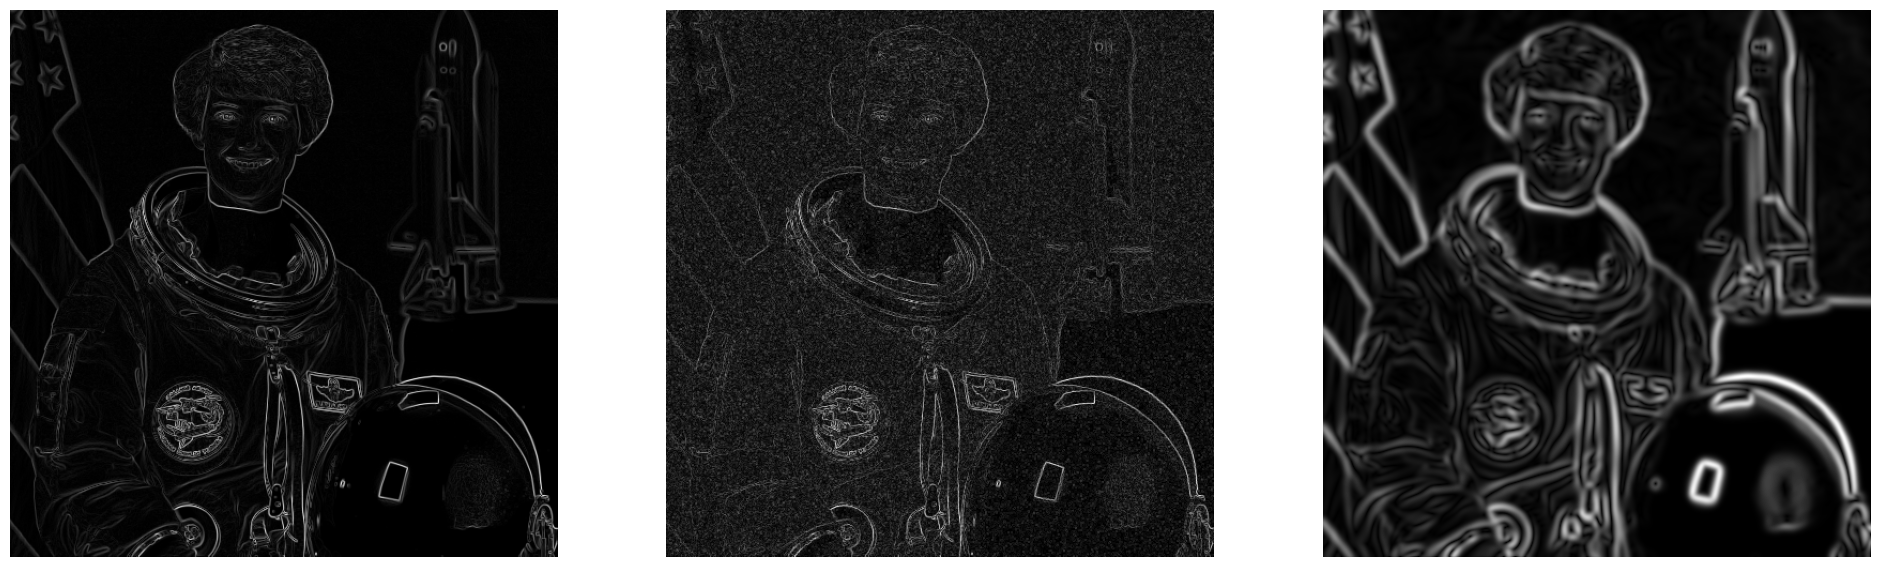

In [ ]:
# TODO: Run Roberts edge detector from skimage filters on gray, noisy, and smoothed images
edges_roberts_gray = skimage.filters.roberts(image)
edges_roberts_noisy = skimage.filters.roberts(image_noisy)
edges_roberts_smooth = skimage.filters.roberts(image_smooth)

# Create visualization
fig = plt.figure(figsize=(24, 8))

ax = fig.add_subplot(1, 3, 1)
ax.imshow(edges_roberts_gray, cmap='gray')
config_plot()

ax = fig.add_subplot(1, 3, 2)
ax.imshow(edges_roberts_noisy, cmap='gray')
config_plot()

ax = fig.add_subplot(1, 3, 3)
ax.imshow(edges_roberts_smooth, cmap='gray')
config_plot()

plt.show()

Prewitt edge detector

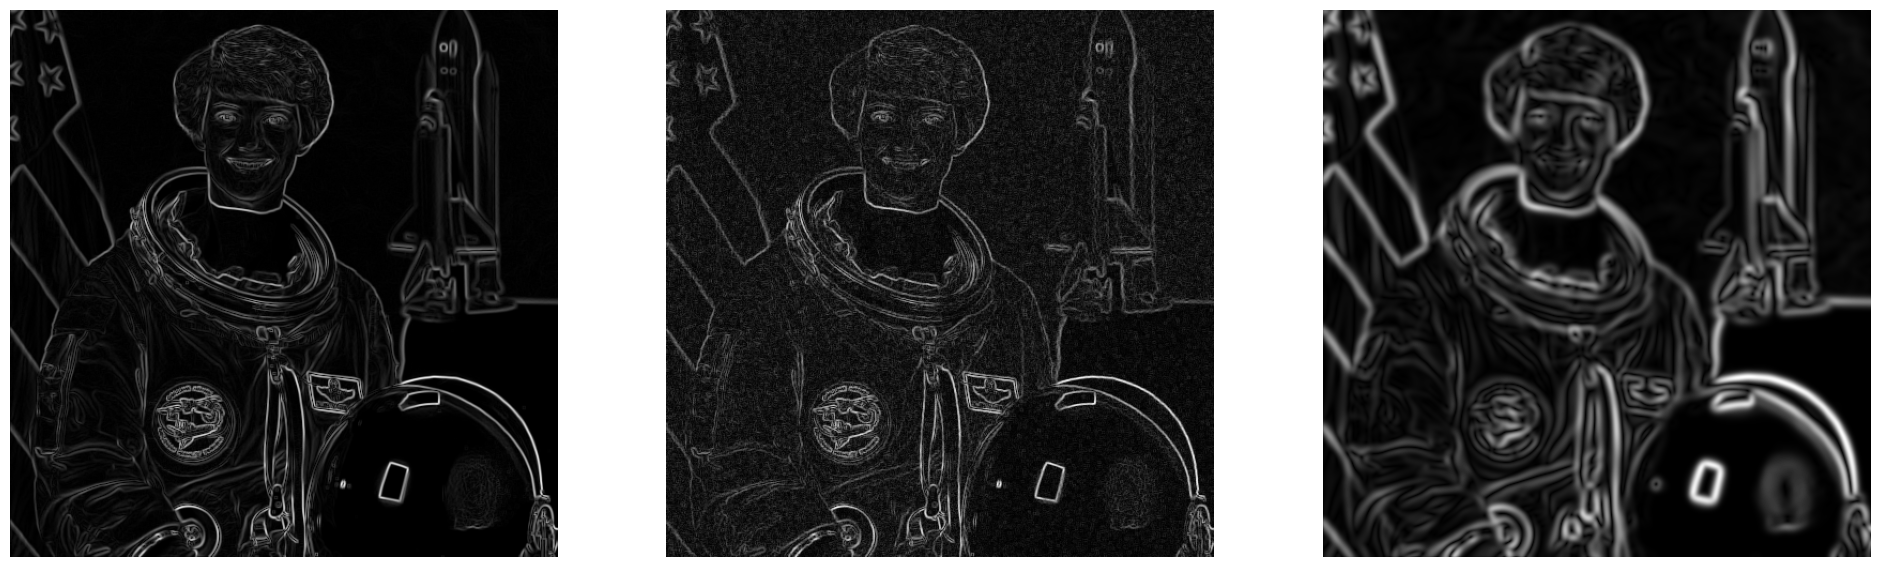

In [ ]:
# TODO: Run Prewitt edge detector from skimage filters on gray, noisy, and smoothed images
edges_prewitt_gray = skimage.filters.prewitt(image)
edges_prewitt_noisy = skimage.filters.prewitt(image_noisy)
edges_prewitt_smooth = skimage.filters.prewitt(image_smooth)

# Create visualization
fig = plt.figure(figsize=(24, 8))

ax = fig.add_subplot(1, 3, 1)
ax.imshow(edges_prewitt_gray, cmap='gray')
config_plot()

ax = fig.add_subplot(1, 3, 2)
ax.imshow(edges_prewitt_noisy, cmap='gray')
config_plot()

ax = fig.add_subplot(1, 3, 3)
ax.imshow(edges_prewitt_smooth, cmap='gray')
config_plot()

plt.show()

Sobel edge detector

[[0.59115663 0.56727306 0.54679965 ... 0.46766212 0.46664842 0.46582388]
 [0.63810969 0.6166921  0.59730246 ... 0.46688637 0.46582001 0.46492649]
 [0.68826538 0.66925573 0.65067565 ... 0.46615411 0.4650585  0.46411993]
 ...
 [0.66322766 0.65556749 0.64479486 ... 0.10276336 0.07468704 0.04993732]
 [0.6599418  0.65098476 0.63872654 ... 0.1004396  0.07249577 0.04796878]
 [0.65694139 0.64691446 0.63344691 ... 0.10155975 0.07335302 0.04844773]]


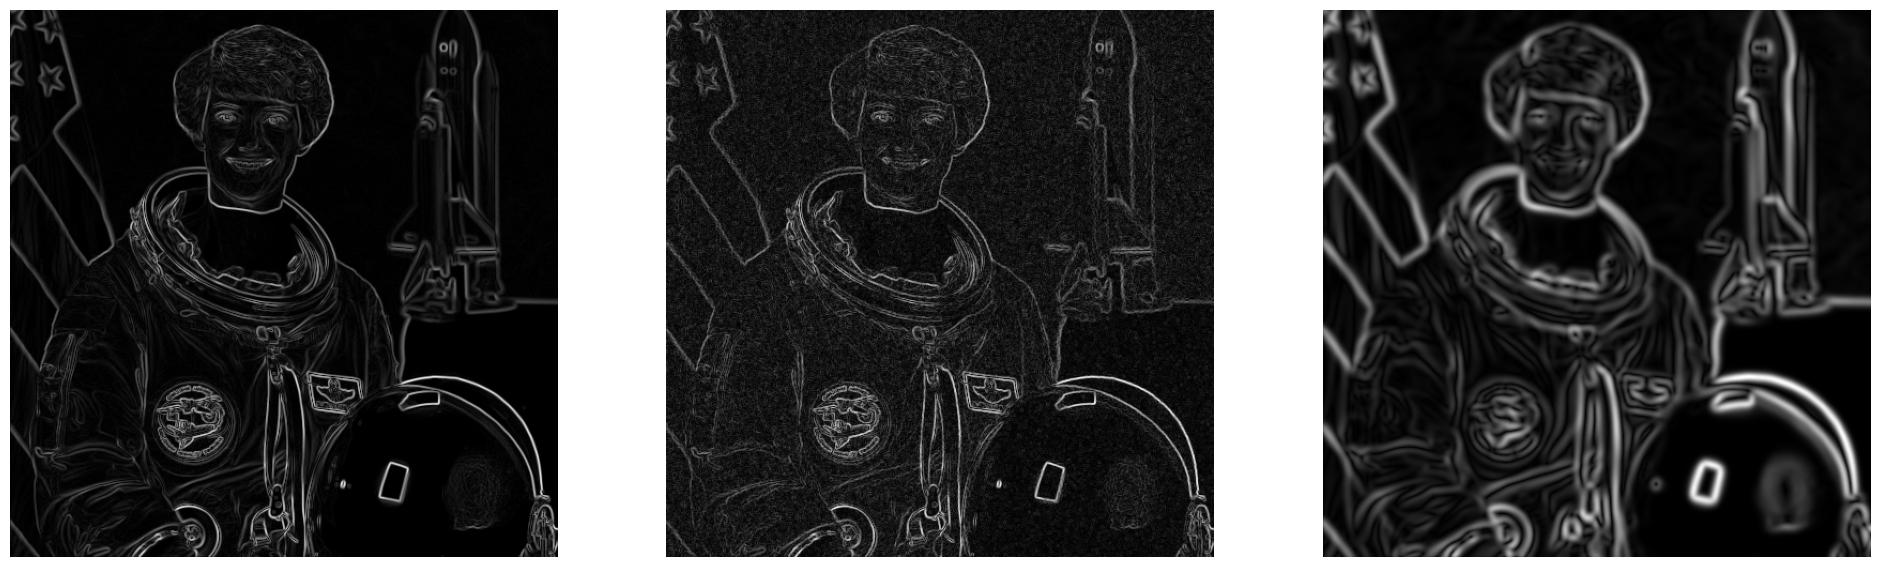

In [ ]:
# TODO: Run sobel edge detector from skimage filters on gray, noisy, and smoothed images
edges_sobel_gray = skimage.filters.sobel(image)
edges_sobel_noisy = skimage.filters.sobel(image_noisy)
edges_sobel_smooth = skimage.filters.sobel(image_smooth)

print(image_smooth)
#print(edges_sobel_smooth)

# Create visualization
fig = plt.figure(figsize=(24, 8))

ax = fig.add_subplot(1, 3, 1)
ax.imshow(edges_sobel_gray, cmap='gray')
config_plot()

ax = fig.add_subplot(1, 3, 2)
ax.imshow(edges_sobel_noisy, cmap='gray')
config_plot()

ax = fig.add_subplot(1, 3, 3)
ax.imshow(edges_sobel_smooth, cmap='gray')
config_plot()

plt.show()

Laplace edge detector

In [ ]:
def find_zero_crossing(image):
    '''
    Finds zero crossings in an image

    Arg(s):
        image : numpy[float32]
            H x W monochrome image
    Returns:
        numpy[float32] : H x W binary edge map
    '''

    # TODO: Compute the sign of the image
    image_sign = np.sign(image)

    # TODO: Find the max and min for each 2 x 2 region in the sign image
    image_max = np.zeros( (image.shape[0] - 1, image.shape[1] - 1) )
    image_min = np.zeros( (image.shape[0] - 1, image.shape[1] - 1) )
    zero_crossing = np.zeros( (image.shape[0] - 1, image.shape[1] - 1) )

    #Confused why we require image_max and image_min instead of just computing the crossing based on a threshols
    for i in range(0, image.shape[0] - 1):
      for j in range(0, image.shape[1] - 1):
        image_max[i, j] = np.max([image_sign[i, j], image_sign[i + 1, j], image_sign[i, j + 1], image_sign[i + 1, j + 1]])
        image_min[i, j] = np.min([image_sign[i, j], image_sign[i + 1, j], image_sign[i, j + 1], image_sign[i + 1, j + 1]])

        if image[i, j] == 0.0 and image_max[i, j] > 0 and image_min[i, j] < 0:
          zero_crossing[i, j] = 1
        elif image_sign[i, j] > 0:
          if image_min[i, j] < 0.0:
            zero_crossing[i, j] = 1
        else:
          if image_max[i, j] > 0.0:
            zero_crossing[i, j] = 1

    #print(zero_crossing)

    return zero_crossing

In [ ]:
# TODO: Run 3x3 Laplace detector from skimage filters on gray, noisy, and smoothed images
laplace_gray = skimage.filters.laplace(image)
laplace_noisy = skimage.filters.laplace(image_noisy)
laplace_smooth = skimage.filters.laplace(image_smooth)

# TODO: Find zero crossings for each of the Laplace images
edges_laplace_gray = find_zero_crossing(laplace_gray)
edges_laplace_noisy = find_zero_crossing(laplace_noisy)
edges_laplace_smooth = find_zero_crossing(laplace_smooth)

# Create visualization
fig = plt.figure(figsize=(24, 16))

ax = fig.add_subplot(2, 3, 1)
ax.imshow(laplace_gray, cmap='gray')
config_plot()

ax = fig.add_subplot(2, 3, 4)
ax.imshow(edges_laplace_gray, cmap='gray')
config_plot()

ax = fig.add_subplot(2, 3, 2)
ax.imshow(laplace_noisy, cmap='gray')
config_plot()

ax = fig.add_subplot(2, 3, 5)
ax.imshow(edges_laplace_noisy, cmap='gray')
config_plot()

ax = fig.add_subplot(2, 3, 3)
ax.imshow(laplace_smooth, cmap='gray')
config_plot()

ax = fig.add_subplot(2, 3, 6)
ax.imshow(edges_laplace_smooth, cmap='gray')
config_plot()

plt.show()


Canny edge detector

In [ ]:
# TODO: Run Canny edge detector on skimage filters on gray and noisy images each with sigma 1, 2, 3
edges_canny_gray_sigma1 = skimage.feature.canny(image)
edges_canny_gray_sigma2 = skimage.feature.canny(image, sigma = 2.0)
edges_canny_gray_sigma3 = skimage.feature.canny(image, sigma = 3.0)
edges_canny_noisy_sigma1 = skimage.feature.canny(image_noisy)
edges_canny_noisy_sigma2 = skimage.feature.canny(image_noisy, sigma = 2.0)
edges_canny_noisy_sigma3 = skimage.feature.canny(image_noisy, sigma = 3.0)

# Create visualization
fig = plt.figure(figsize=(24, 16))

ax = fig.add_subplot(2, 3, 1)
ax.imshow(edges_canny_gray_sigma1, cmap='gray')
config_plot()

ax = fig.add_subplot(2, 3, 2)
ax.imshow(edges_canny_gray_sigma2, cmap='gray')
config_plot()

ax = fig.add_subplot(2, 3, 3)
ax.imshow(edges_canny_gray_sigma3, cmap='gray')
config_plot()

ax = fig.add_subplot(2, 3, 4)
ax.imshow(edges_canny_noisy_sigma1, cmap='gray')
config_plot()

ax = fig.add_subplot(2, 3, 5)
ax.imshow(edges_canny_noisy_sigma2, cmap='gray')
config_plot()

ax = fig.add_subplot(2, 3, 6)
ax.imshow(edges_canny_noisy_sigma3, cmap='gray')
config_plot()

plt.show()